Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC

Defining the function to plot the SVM decision boundary and data points

In [2]:
def plot_SVM(X_train,Y_train,X_test,Y_test,clf,title = ''):
  x1_min,x1_max = X_train[:,0].min()-1,X_train[:,0].max()+1
  x2_min,x2_max = X_train[:,1].min()-1,X_train[:,1].max()+1
  x1,x2 = np.meshgrid(np.arange(x1_min,x1_max,0.1),np.arange(x2_min,x2_max,0.05))
  z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
  z = z.reshape(x1.shape)
  plt.contourf(x1,x2,z,cmap=plt.cm.coolwarm, alpha=0.8)
  if(np.any(Y_train==0)):
    xTr0, xTr1 = X_train[np.where(Y_train== 0)[0]],X_train[np.where(Y_train==1)[0]]
    xTs0, xTs1 = X_test[np.where(Y_test== 0)[0]],X_test[np.where(Y_test==1)[0]]
  else:
    xTr0, xTr1 = X_train[np.where(Y_train== -1)[0]],X_train[np.where(Y_train==1)[0]]
    xTs0, xTs1 = X_test[np.where(Y_test== -1)[0]],X_test[np.where(Y_test==1)[0]]

  plt.scatter(xTr0[:,0],xTr0[:,1],color = 'green',marker = 'o', label= 'training cls')
  plt.scatter(xTr1[:,0],xTr1[:,1],color = 'green',marker = 'o')

  plt.scatter(xTs0[:,0],xTs0[:,1],color = 'red',marker = 'x', label= 'test cls(-1)')
  plt.scatter(xTs1[:,0],xTs1[:,1],color = 'blue',marker = 'x', label= 'test cls(1)')

  plt.legend()
  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.title(title)

  plt.show()

Defining function to apply SVM and output train and test accuracies

In [3]:
def svmFunc(X_train,Y_train,X_test,Y_test,Kernel):
  if(Kernel== "linear"):
    #print("linear")
    svmClassifier = SVC(kernel='linear')
  elif(Kernel == "RBF"):
    #print("RBF")
    svmClassifier = SVC(kernel='rbf')
  elif(Kernel == "polynomial"):
    #print("poly")
    svmClassifier = SVC(kernel='poly')
  else:
    print("enter kernel as 'linear','RBF' or 'polynomial'")
  svmClassifier.fit(X_train,Y_train)
  Y_pred_train = svmClassifier.predict(X_train)
  Y_pred_test = svmClassifier.predict(X_test)
  #print(Y_test)
  #print(Y_pred_test)
  train_error = np.sum(Y_pred_train!=Y_train)/(1.0*X_train.shape[0])
  test_error = np.sum(Y_pred_test!=Y_test)/(1.0*X_test.shape[0])
  if(Kernel== "linear"):
    coefficient = svmClassifier.coef_
    intercept = svmClassifier.intercept_
    plot_SVM(X_train,Y_pred_train,X_test,Y_pred_test,svmClassifier,title = 'Linear SVM')
  elif(Kernel == "RBF"):
    plot_SVM(X_train,Y_pred_train,X_test,Y_pred_test,svmClassifier,title = 'RBF SVM')
  elif(Kernel == "polynomial"):
    plot_SVM(X_train,Y_pred_train,X_test,Y_pred_test,svmClassifier,title = 'Polynomial SVM')
  return (1-train_error),(1-test_error)

Loading the data

In [4]:
data1 = loadmat("dataset1.mat")
X_train1 = data1['X_trn']
Y_train1 = data1['Y_trn']
X_test1 = data1['X_tst']
Y_test1 = data1['Y_tst']
Y_train1 = Y_train1.ravel()
Y_test1 = Y_test1.ravel()

Result for training with linear kernal for dataset 1

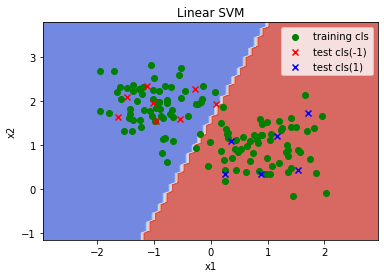

Accuracy for linear kernal:
Train accuracy = 96.83%
Test accuracy = 92.86%


In [5]:
ln_train_accuracy1,ln_test_accuracy1 = svmFunc(X_train1,Y_train1,X_test1,Y_test1,"linear")
print("Accuracy for linear kernal:")
print(f"Train accuracy = {ln_train_accuracy1*100:.2f}%")
print(f"Test accuracy = {ln_test_accuracy1*100:.2f}%")

Result for training with rbf kernal for dataset 1

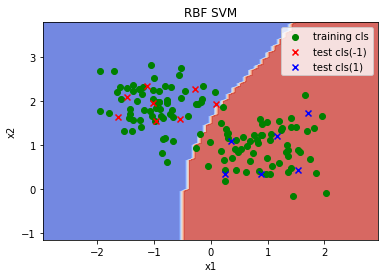

Accuracy for RBF kernal:
Train accuracy = 96.83%
Test accuracy = 92.86%


In [6]:
rbf_train_accuracy1,rbf_test_accuracy1 = svmFunc(X_train1,Y_train1,X_test1,Y_test1,"RBF")
print("Accuracy for RBF kernal:")
print(f"Train accuracy = {rbf_train_accuracy1*100:.2f}%")
print(f"Test accuracy = {rbf_test_accuracy1*100:.2f}%")

Result for training with Polynomial kernal for dataset 1

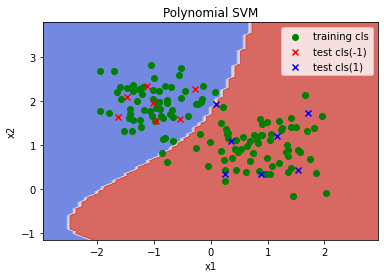

Accuracy for polynomial kernal:
Train accuracy = 96.83%
Test accuracy = 100.00%


In [7]:
poly_train_accuracy1,poly_test_accuracy1 = svmFunc(X_train1,Y_train1,X_test1,Y_test1,"polynomial")
print("Accuracy for polynomial kernal:")
print(f"Train accuracy = {poly_train_accuracy1*100:.2f}%")
print(f"Test accuracy = {poly_test_accuracy1*100:.2f}%")

Loading the dataset 2

In [8]:
data2 = loadmat("dataset2.mat")
X_train2 = data2['xtrain']
Y_train2 = data2['ytrain']
X_test2 = data2['xtest']
Y_test2 = data2['ytest']
Y_train2 = Y_train2.ravel()
Y_test2 = Y_test2.ravel()

Result for training with linear kernal for dataset 2

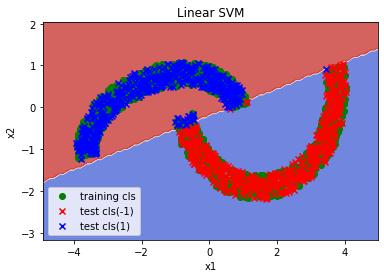

Accuracy for linear kernal:
Train accuracy = 97.60%
Test accuracy = 97.70%


In [9]:
ln_train_accuracy2,ln_test_accuracy2 = svmFunc(X_train2,Y_train2,X_test2,Y_test2,"linear")
print("Accuracy for linear kernal:")
print(f"Train accuracy = {ln_train_accuracy2*100:.2f}%")
print(f"Test accuracy = {ln_test_accuracy2*100:.2f}%")

Result for training with RBF kernal for dataset 2

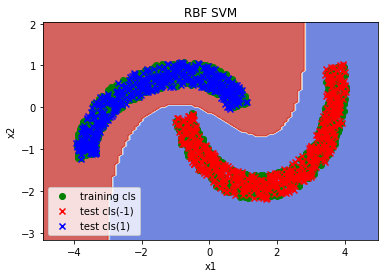

Accuracy for RBF kernal:
Train accuracy = 100.00%
Test accuracy = 100.00%


In [10]:
rbf_train_accuracy2,rbf_test_accuracy2 = svmFunc(X_train2,Y_train2,X_test2,Y_test2,"RBF")
print("Accuracy for RBF kernal:")
print(f"Train accuracy = {rbf_train_accuracy2*100:.2f}%")
print(f"Test accuracy = {rbf_test_accuracy2*100:.2f}%")

Result for training with Polynomial kernal for dataset 2

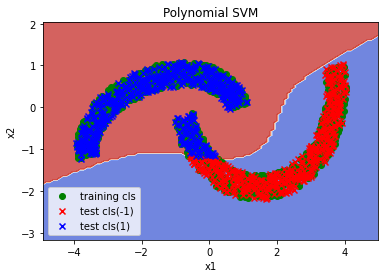

Accuracy for polynomial kernal:
Train accuracy = 92.60%
Test accuracy = 91.60%


In [11]:
poly_train_accuracy2,poly_test_accuracy2 = svmFunc(X_train2,Y_train2,X_test2,Y_test2,"polynomial")
print("Accuracy for polynomial kernal:")
print(f"Train accuracy = {poly_train_accuracy2*100:.2f}%")
print(f"Test accuracy = {poly_test_accuracy2*100:.2f}%")